# THE SPARK FOUNDATION INTERNSHIP
# Name: VIVISHA SINGH
# Domain: Computer Vision & IOT TASK 2
# I have used KMeans Clustering Algorithm for colors Detection in images

# Step-1: Importing Libraries

In [1]:
!pip install opencv-python


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76



%matplotlib inline

# Step-2: Reading image

The type of this input is <class 'numpy.ndarray'>
Shape: (212, 238, 3)


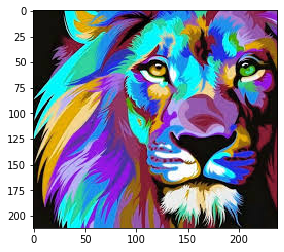

In [4]:
image = cv2.imread('2.jpg')
# image = cv2.imread('1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

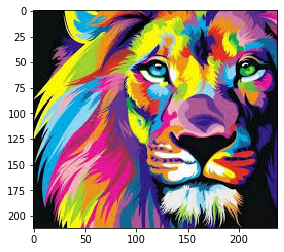

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

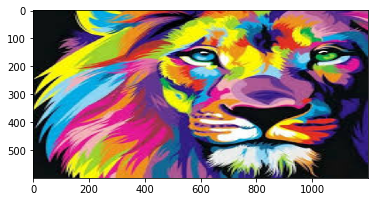

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [7]:
# COLOR IDNTIFICATION
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

I have combined all the steps in two method.

In [8]:

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
#     print(modified_image)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    print(labels)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[0 0 0 ... 0 0 0]


[array([25.74037805, 31.62921633, 59.87797009]),
 array([144.15856251, 189.4350639 , 210.08191025]),
 array([216.25221222, 193.6126221 ,  42.32708293]),
 array([173.31806365,  67.20790967, 117.35064376])]

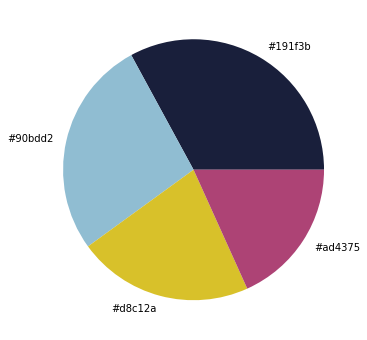

In [10]:
get_colors(get_image('2.jpg'), 4, True)
# get_colors(get_image('1.jpg'), 9, True)

----end of code----